# Forest Fire Regression Problem
    In this Colab, EDA of dataset that consist of the area of forest fire, meteorological and other data is performed. 
    
    This Data is obtained from UCI Repository : https://archive.ics.uci.edu/ml/datasets/Forest+Fires
    

In [0]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

In [80]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


### Description of Data:
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 

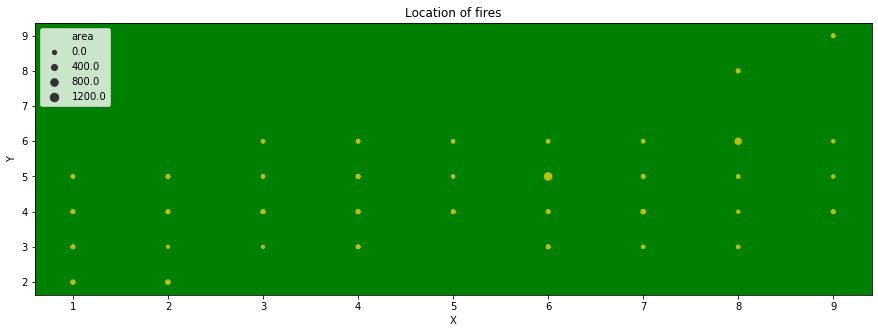

In [79]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='X',y='Y',size='area',color='y',linewidth=0,data=df)
plt.title("Location of fires")
plt.legend(loc='best')
ax = plt.axes()
ax.set_facecolor("green")
plt.show()

In [37]:
df.dtypes

X           int64
Y           int64
month    category
day        object
FFMC      float64
DMC       float64
DC        float64
ISI       float64
temp      float64
RH          int64
wind      float64
rain      float64
area      float64
dtype: object

In [0]:
df['month'] = pd.Categorical(df.month)
df['day'] = pd.Categorical(df.day)

In [39]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


  Except 'month' and 'day', all other columns are continous. Here the columns 'rain' and 'area' seems to be skewed.

In [44]:
df.rain.value_counts()

0.0    509
0.8      2
0.2      2
0.4      1
6.4      1
1.4      1
1.0      1
Name: rain, dtype: int64

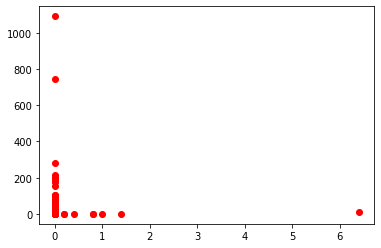

In [48]:
plt.plot(df.rain,df.area,'ro')

In [49]:
df.rain.corr(df.area)

-0.007365729279292286

In [45]:
df[df.rain!=0]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
243,7,4,aug,sun,91.8,175.1,700.7,13.8,21.9,73,7.6,1.0,0.00
286,7,6,jul,wed,91.2,183.1,437.7,12.5,12.6,90,7.6,0.2,0.00
499,7,5,aug,tue,96.1,181.1,671.2,14.3,27.3,63,4.9,6.4,10.82
500,8,6,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00
501,7,5,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00
502,4,4,aug,tue,96.1,181.1,671.2,14.3,20.7,69,4.9,0.4,0.00
509,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17


Once When there was a heavy rain there was a fire(rain =6.4). This is an abnormal event and the correlation between the rain and area is nearly 0. So can we neglect this?

There is a possibility that due to rain the fire area is reduced. So we will retain the data.(Field knowledge)


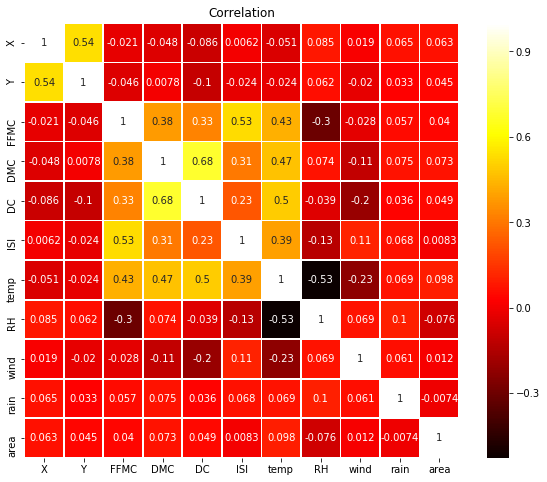

In [97]:
def plot_corr(data,title="Correlation"):
    plt.figure(figsize=(10,8))
    sns.heatmap(data.corr(),annot=True,linewidths=0.8,square=True,cmap='hot')
    plt.title(title)
    plt.show()

plot_corr(df)

There is no variable that make a significant correlation with area. 

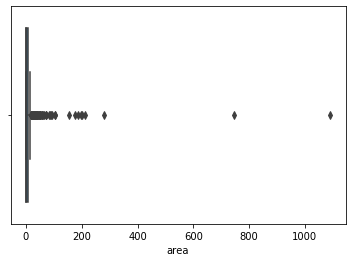

In [89]:
sns.boxplot(x='area',data=df)
plt.show()

There are two instance of great fires that was greater than 400..


In [68]:
df[df.area>400]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28


Both these fires seems to have occured at the same circumstances. No rain, wind of 4-5 km/hr, same RH, temp, almost same time of the year and at closer location! 

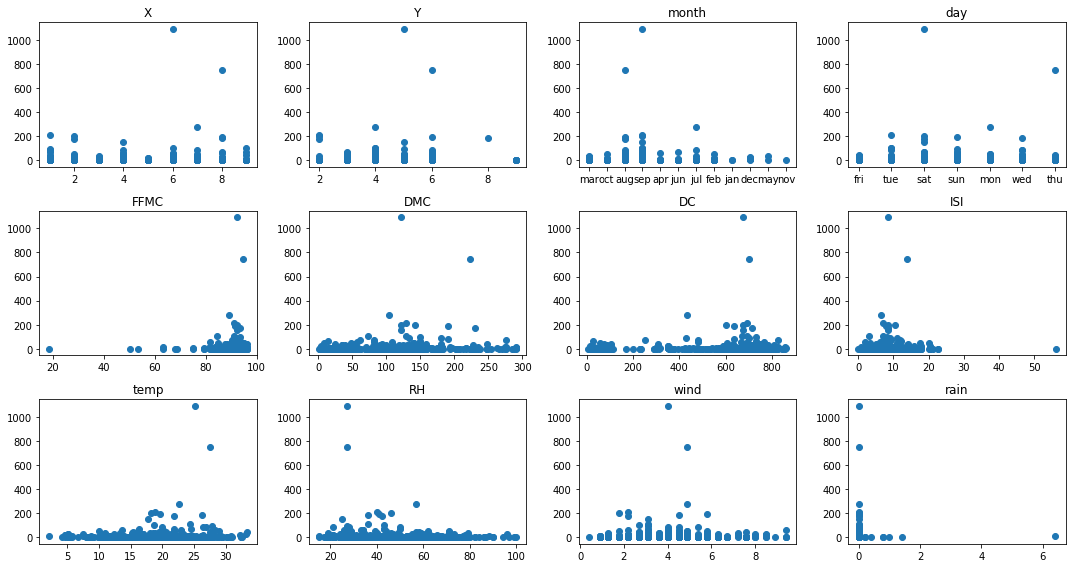

In [119]:
i=1
plt.figure(figsize=(15,8))
for col in df.columns[:-1]:
    plt.subplot(3,4,i)
    plt.scatter(df[col],df.area)
    plt.title(col)
    i=i+1
plt.tight_layout()
plt.show()

ISI is greater than 30 at only one data point.

In [120]:
df[df.ISI>30]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
22,7,4,jun,sun,94.3,96.3,200.0,56.1,21.0,44,4.5,0.0,0.0
